# Descriptive Analysis 

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
##set a working directory
user = os.path.expanduser('~')
display(user)
os.makedirs(f'{user}/Desktop/thesis/', exist_ok=True)
path = os.chdir(f'{user}/Desktop/'+'thesis/')

'/Users/NatStrom'

In [3]:
data_analysis = pd.read_csv('data_final.csv')

In [4]:
data_analysis

,Unnamed: 0,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,...,gdp_log,uhc_index,uhc_available_score,access_drinkwater_index,access_sani_index,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
0,0,AGO,1990,12264.0,17229.0,23733.0,12264.0,17229.0,23733.0,8904.0,...,6.855711,NaN,NaN,NaN,NaN,53226.0,6720.0,49866.0,49866.0,53226.0
1,1,AGO,1990,12264.0,17229.0,23733.0,12264.0,17229.0,23733.0,8904.0,...,6.855711,NaN,NaN,NaN,NaN,53226.0,6720.0,49866.0,49866.0,53226.0
2,2,AGO,1990,12264.0,17229.0,23733.0,12264.0,17229.0,23733.0,8904.0,...,6.855711,NaN,NaN,NaN,NaN,53226.0,6720.0,49866.0,49866.0,53226.0
3,3,AGO,1990,12264.0,17229.0,23733.0,12264.0,17229.0,23733.0,8904.0,...,6.855711,NaN,NaN,NaN,NaN,53226.0,6720.0,49866.0,49866.0,53226.0
4,4,AGO,1990,12264.0,17229.0,23733.0,12264.0,17229.0,23733.0,8904.0,...,6.855711,NaN,NaN,NaN,NaN,53226.0,6720.0,49866.0,49866.0,53226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46607,46607,SYC,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46608,46608,MAR,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46609,46609,MUS,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46610,46610,SYC,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_analysis = data_analysis.drop(columns={'Unnamed: 0'})

In [6]:
print(data_analysis.dtypes)
print(data_analysis.columns)
print(data_analysis.describe(include='all'))

## sanity check to ensure the spread of the data is correct
print('sanity check 1, ensure appropriate years and countries are represented')
list_country=list(list(data_analysis['iso'].drop_duplicates()))
list_year=list(list(data_analysis['year_id'].drop_duplicates()))
print('country list', list_country)
print('year list', list_year)
#inspect for NAs
print('following checks for completeness of all columns')
print(data_analysis['iso'].isnull().values.any())
print(data_analysis['year_id'].isnull().values.any())
print(data_analysis['ihme_dah_total_aid'].isnull().values.any())
print(data_analysis['best_log'].isnull().values.any())
print(data_analysis['daly_all'].isnull().values.any())
print(data_analysis['age0014_value'].isnull().values.any())
print(data_analysis['gdp_pcap_value'].isnull().values.any())
print(data_analysis['xpd_gdp_value'].isnull().values.any())
print(data_analysis['uhc_index'].isnull().values.any())
print(data_analysis['uhc_available_score'].isnull().values.any())
print(data_analysis['access_drinkwater_index'].isnull().values.any())
print(data_analysis['access_sani_index'].isnull().values.any())

iso                                                                                                                      object
year_id                                                                                                                   int64
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                    float64
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                    float64
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                  float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages    float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                    float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages  

In [7]:
data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46612 entries, 0 to 46611
Data columns (total 52 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   iso                                                                                                                   46612 non-null  object 
 1   year_id                                                                                                               46612 non-null  int64  
 2   daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                  32557 non-null  float64
 3   daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                  32557 non-null  float64
 4   daly

## dependent variable

In [8]:
print(data_analysis['daly_all'].describe())
print(data_analysis['daly_all'].info())
#standard deviation should not be 0, that would mean it does not change over time

count    32557.000000
mean     20312.820039
std      13928.082409
min        915.000000
25%      10974.000000
50%      16086.000000
75%      24666.000000
max      74108.000000
Name: daly_all, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 46612 entries, 0 to 46611
Series name: daly_all
Non-Null Count  Dtype  
--------------  -----  
32557 non-null  float64
dtypes: float64(1)
memory usage: 364.3 KB
None


/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


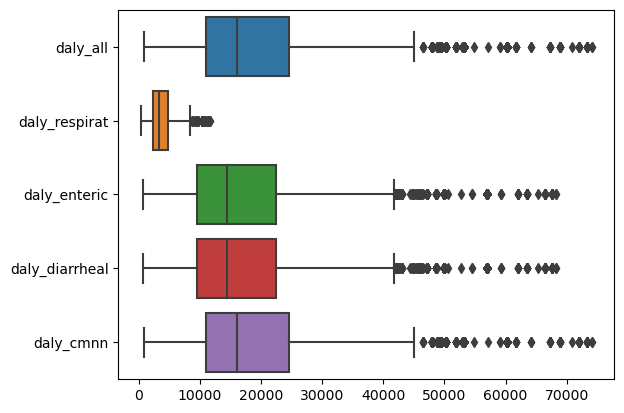

In [9]:
sns.boxplot(data=data_analysis[["daly_all", "daly_respirat",'daly_enteric','daly_diarrheal','daly_cmnn']], orient="h")
plt.savefig('daly_causes_boxplot.png')

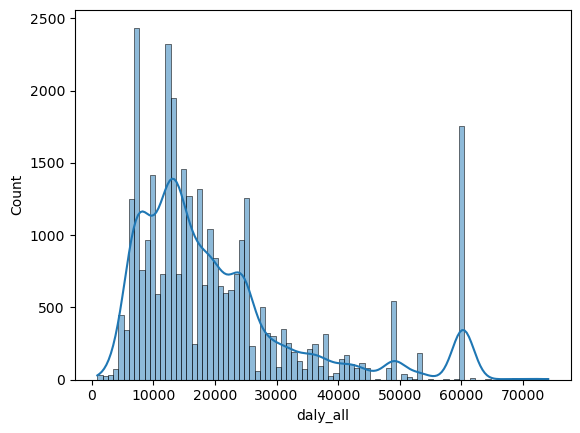

In [10]:
#produce distribution plots
sns.histplot(data_analysis['daly_all'],kde = True)
plt.savefig('daly_all_hist.png')

In [11]:
#test for skweness
import scipy
from scipy.stats import skewtest
scipy.stats.skewtest(data_analysis['daly_all'], axis=0, nan_policy='omit', alternative='two-sided')

SkewtestResult(statistic=83.89686653537682, pvalue=0.0)

In [12]:
#test for outliers
## see data_analysis.daly_all.describe() or the boxplots
### clear indication that there are outliers - now use statistical tests

In [13]:
#test for missingness
values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

## generally 29% missingness, which is strange since it sshould be complete, its estimates

,col,pct_missing
0,iso,0.000000
1,year_id,0.000000
2,daly_mean_All causes_No access to handwashing ...,30.153179
3,daly_mean_All causes_Unsafe sanitation_btsx_Al...,30.153179
4,daly_mean_All causes_Unsafe water source_btsx_...,30.153179
5,"daly_mean_Communicable, maternal, neonatal, an...",30.153179
6,"daly_mean_Communicable, maternal, neonatal, an...",30.153179
7,"daly_mean_Communicable, maternal, neonatal, an...",30.153179
8,daly_mean_Diarrheal diseases_No access to hand...,30.153179
9,daly_mean_Diarrheal diseases_Unsafe sanitation...,30.153179


In [14]:
#what to do with missing data? balanced/ unbalanced panel?


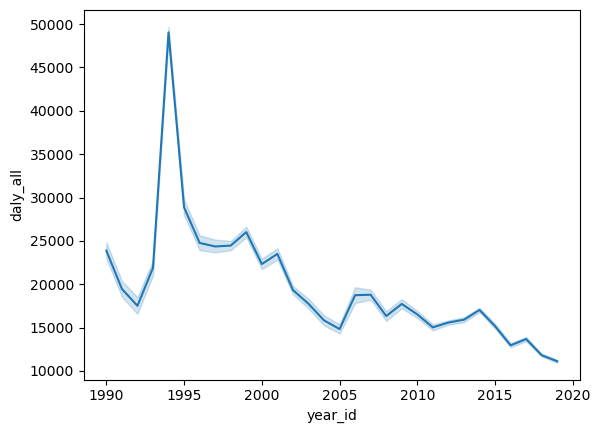

In [15]:
#time trend of the data
sns.lineplot(x='year_id',y='daly_all',data=data_analysis)
plt.savefig('daly_all_timetrend.png')

In [16]:
#judging from the descriptive analysis, need there be any transformations?
##no

## independent variable

binary conflict variable

In [17]:
data_analysis['dummy_conflict'].describe()

count    46588.000000
mean         0.096699
std          0.295550
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dummy_conflict, dtype: float64

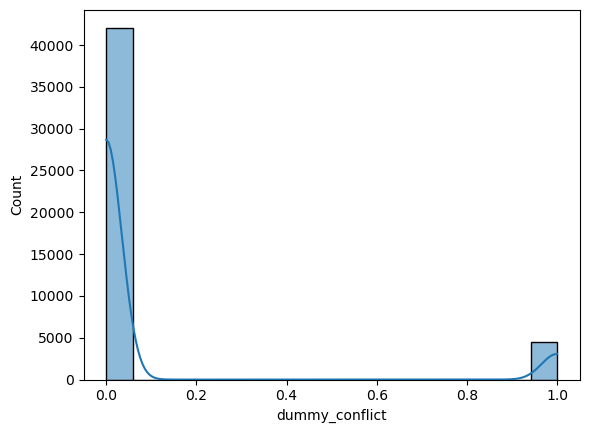

In [18]:
#produce distribution plots
sns.histplot(data_analysis['dummy_conflict'],kde = True)
plt.savefig('dummy_conflict_hist.png')

best_log fatalities

In [19]:
data_analysis['best_log'].describe()

count    45690.000000
mean         1.549821
std          1.252726
min          0.000000
25%          0.693147
50%          1.386294
75%          2.197225
max         10.782782
Name: best_log, dtype: float64

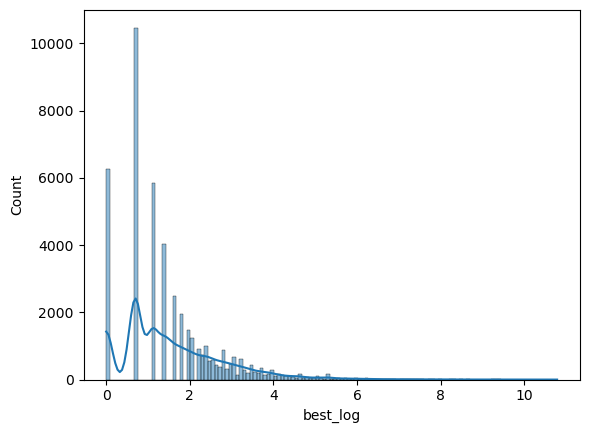

In [20]:
#produce distribution plots
sns.histplot(data_analysis['best_log'],kde = True)
plt.savefig('best_hist.png')

#what does the distribution say? --> log transform the variable

In [21]:
##inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)

iso                                                                                                                         0
year_id                                                                                                                     0
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                    14055
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                    14055
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                  14055
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages    14055
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                    14055
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages                

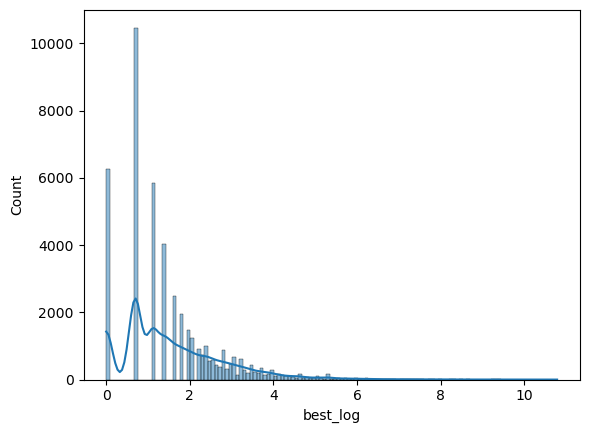

In [22]:
#compare logtransformed with non logtransfomed variables

sns.histplot(data_analysis['best_log'],kde=True)

plt.savefig('conflict_log.png')

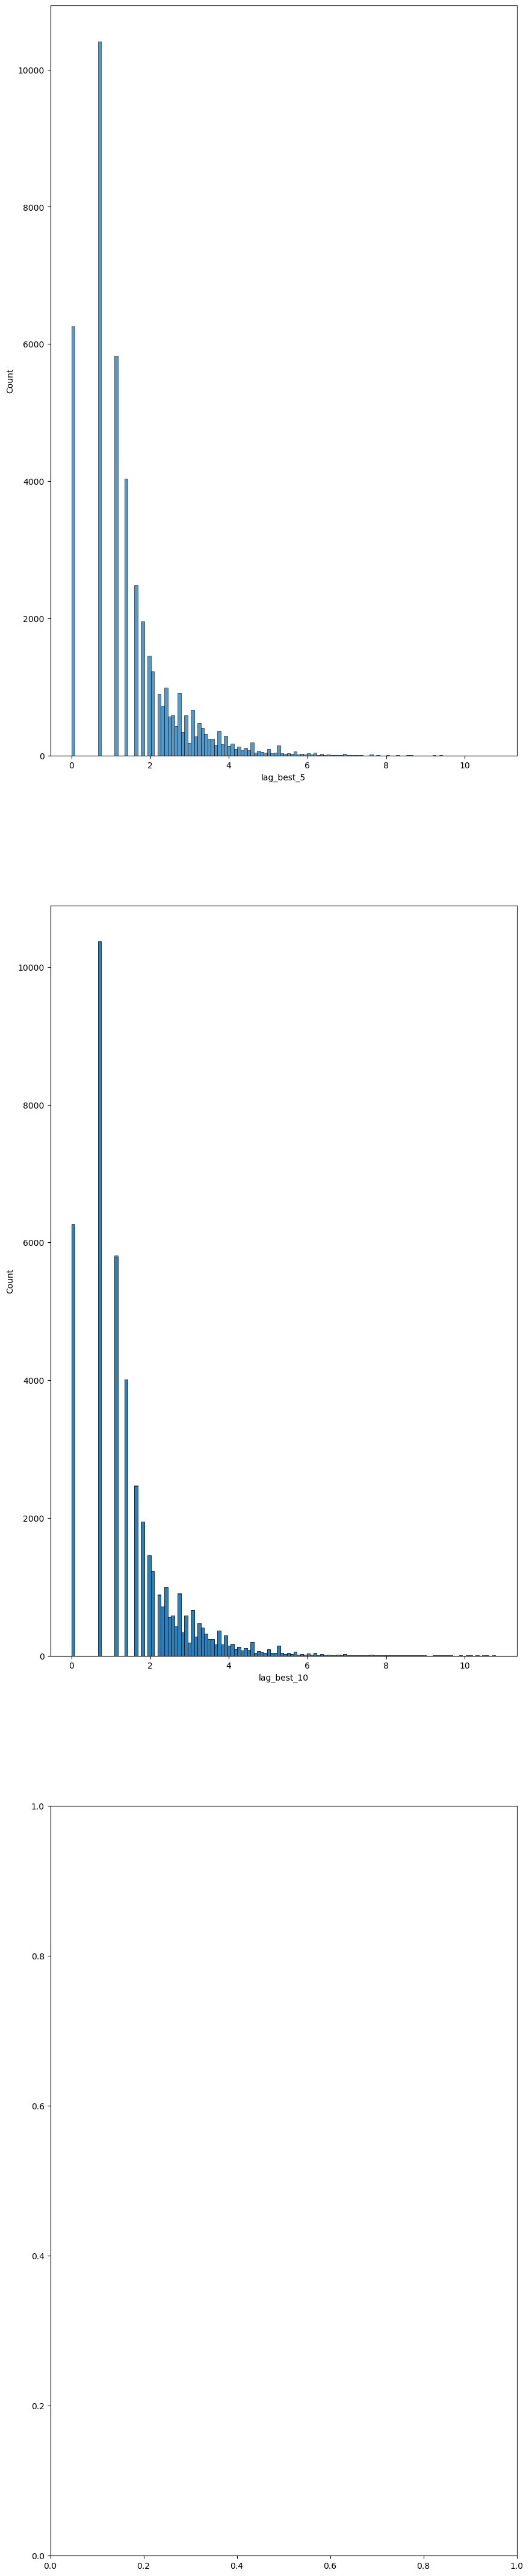

In [23]:
#inspect the conflict lags
figure, axes = plt.subplots(3,1,figsize=(10,55))
sns.histplot(data_analysis['lag_best_5'],ax=axes[0])
sns.histplot(data_analysis['lag_best_10'],ax=axes[1])
sns.histplot(data_analysis['lag_best_20'],ax=axes[1])

plt.savefig('conflict_lag.png')

dummy type of conflict

In [24]:
data_analysis[['dummy_sb','dummy_os','dummy_ns']].describe()

,dummy_sb,dummy_os,dummy_ns
count,46588.000000,46588.000000,46588.000000
mean,0.476303,0.335215,0.169207
std,0.499443,0.472071,0.374938
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


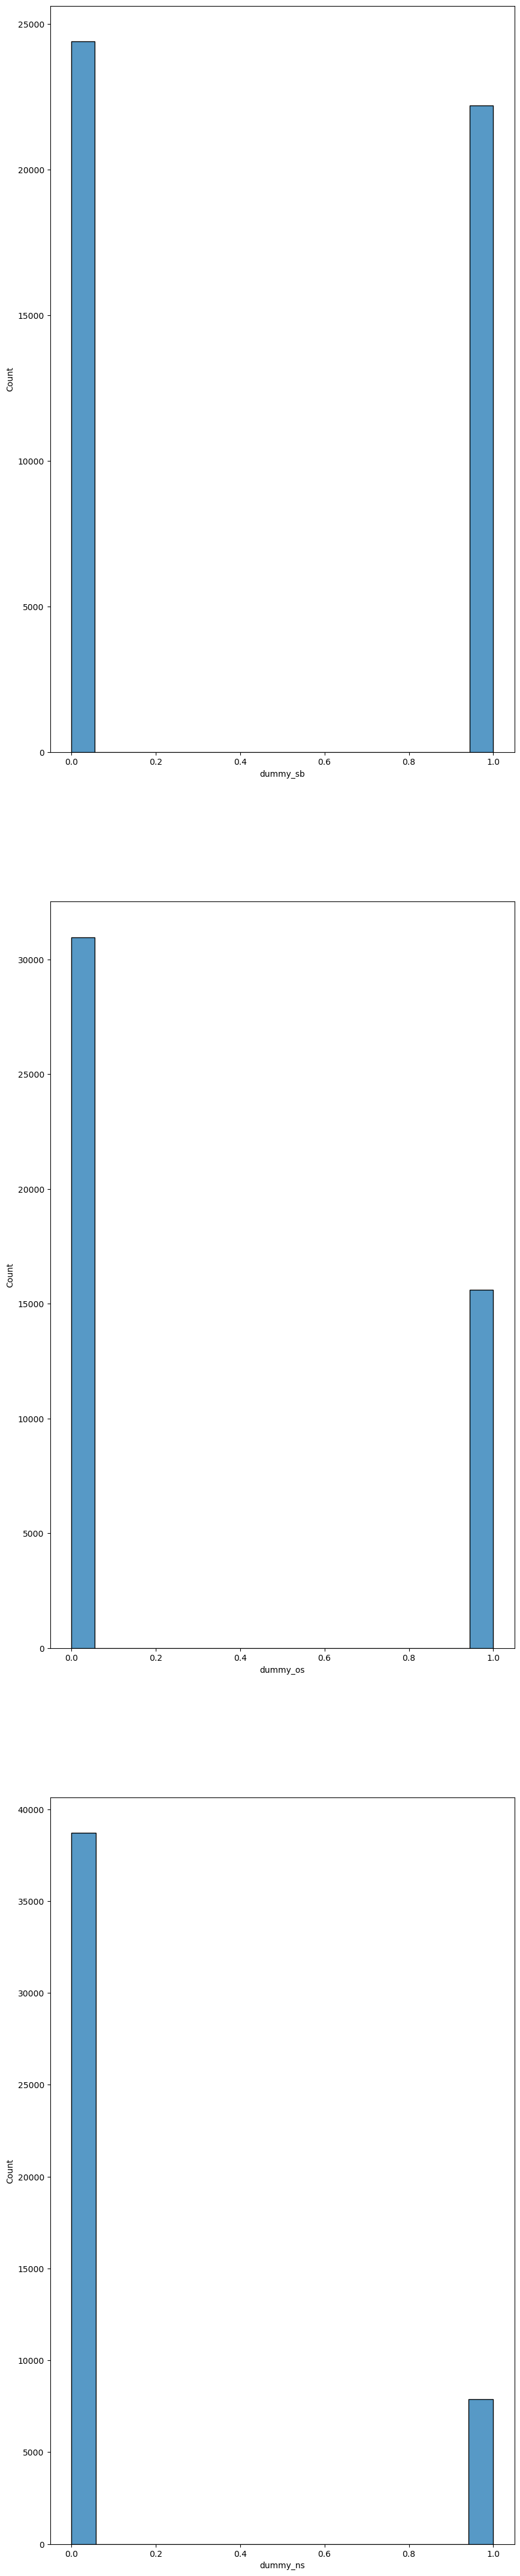

In [25]:
#inspect the conflict lags
figure, axes = plt.subplots(3,1,figsize=(10,55))
sns.histplot(data_analysis['dummy_sb'],ax=axes[0])
sns.histplot(data_analysis['dummy_os'],ax=axes[1])
sns.histplot(data_analysis['dummy_ns'],ax=axes[2])

plt.savefig('conflict_type.png')

dummy neighboring country in conflict

In [26]:
data_analysis['dummy_neighbor'].describe()

count    44682.000000
mean         0.973524
std          0.160548
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: dummy_neighbor, dtype: float64

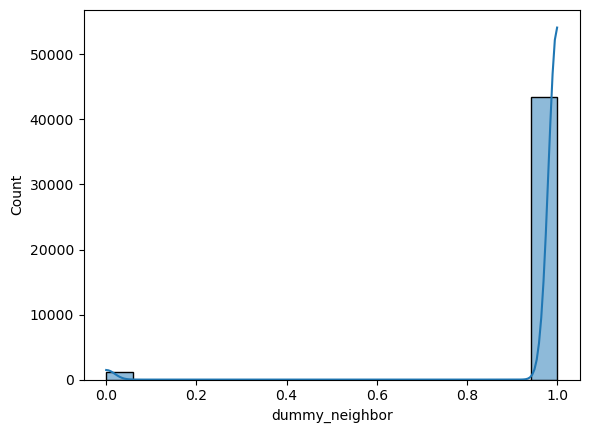

In [27]:
sns.histplot(data_analysis['dummy_neighbor'],kde=True)
plt.savefig('conflict_neighbor.png')

## controls package standard

In [28]:
#get descriptives
print(data_analysis['gdp_log'].describe())
print(data_analysis['age0014_value'].describe())
print(data_analysis['xpd_gdp_value'].describe())
# all variables vary over time, the std is not zero

count    28701.000000
mean         6.392731
std          1.107102
min          4.704661
25%          5.538496
50%          6.055398
75%          7.520659
max          9.895945
Name: gdp_log, dtype: float64
count    31714.000000
mean        45.645723
std          3.213873
min         27.461720
25%         43.707819
50%         46.382418
75%         48.072818
max         51.180881
Name: age0014_value, dtype: float64
count    11807.000000
mean        15.915353
std          8.733476
min          0.000184
25%         10.089297
50%         14.646567
75%         24.935180
max         52.181411
Name: xpd_gdp_value, dtype: float64


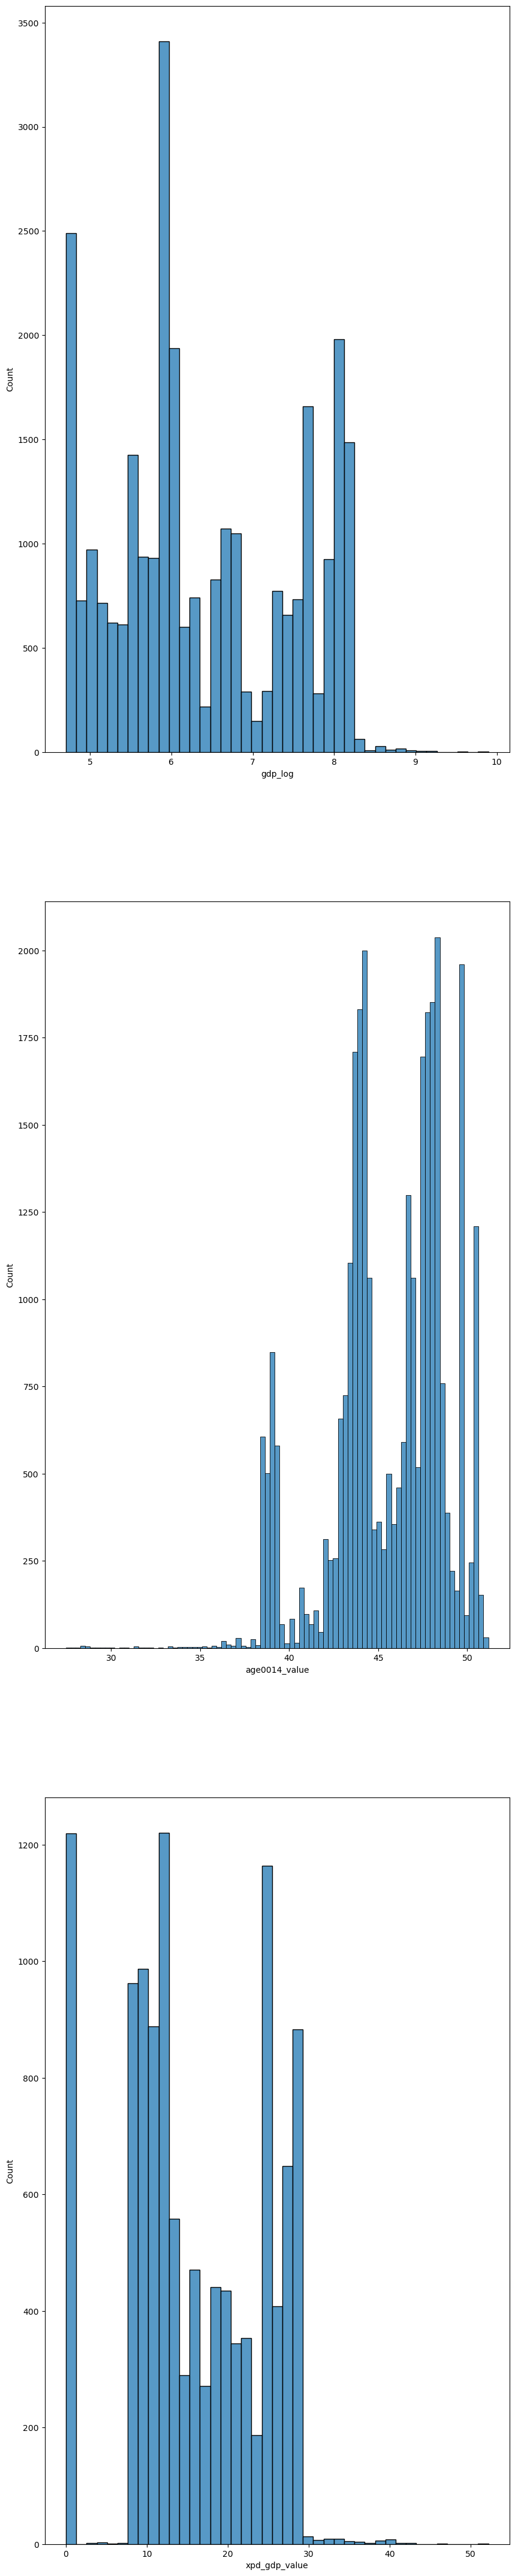

In [29]:
#produce distribution plots
figure, axes = plt.subplots(3,1,figsize=(10,55))
sns.histplot(data_analysis['gdp_log'],ax=axes[0])
sns.histplot(data_analysis['age0014_value'],ax=axes[1])
sns.histplot(data_analysis['xpd_gdp_value'],ax=axes[2])
plt.savefig('standard_control_hist.png')

#gdp has already been logtransformed

In [30]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

iso                                                                                                                         0
year_id                                                                                                                     0
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                    14055
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                    14055
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                  14055
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages    14055
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                    14055
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages                

In [44]:
data_analysis.to_csv('data_analysis.csv')

## controls package health

In [31]:
#get descriptives
display(data_analysis['uhc_index'].describe())
display(data_analysis['dah_total_log'].describe())
#all varables vary over time, the std is not 0

count    7122.000000
mean       34.215854
std         9.874990
min        13.663830
25%        26.570570
50%        36.671300
75%        41.547760
max        69.405770
Name: uhc_index, dtype: float64

count    29609.000000
mean        11.182736
std          1.771392
min          4.564348
25%          9.677402
50%         10.966559
75%         12.421434
max         14.271484
Name: dah_total_log, dtype: float64

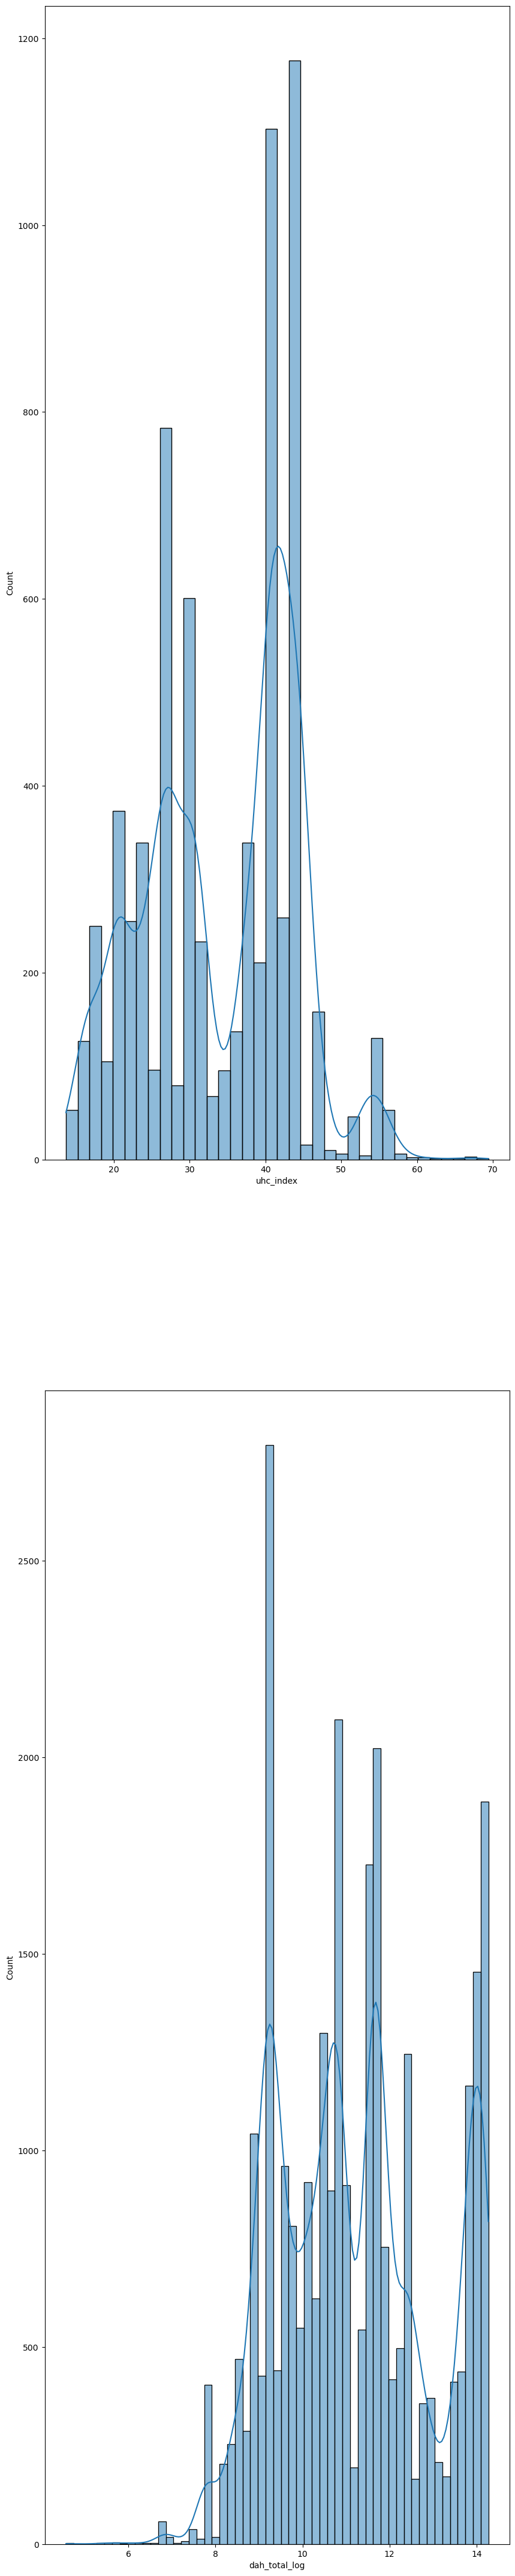

In [32]:
#produce distribution plots
figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_analysis['uhc_index'],kde = True, ax=axes[0])
sns.histplot(data_analysis['dah_total_log'],kde = True, ax=axes[1])
plt.savefig('health_control_hist.png')
##dah has already been log transformed

In [33]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

iso                                                                                                                         0
year_id                                                                                                                     0
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                    14055
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                    14055
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                  14055
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages    14055
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                    14055
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages                

## controls package disaster -- still to do, waiting for EM-DAT DATA

In [34]:
#get descriptives
data_analysis['best'].describe()
data_analysis['best'].describe()
data_analysis['best'].describe()

KeyError: 'best'

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['daly_all'],kde = True)
plt.savefig('daly_all_hist.png')

In [ ]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

# Start the statistical analysis in python

In [35]:
import statsmodels

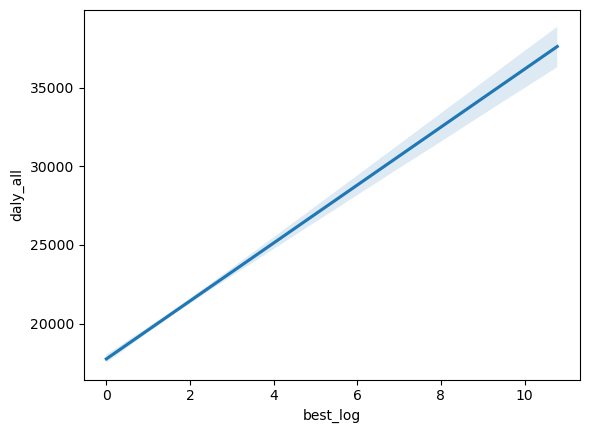

In [36]:
## simple regression plot with line of best fit between two variables
plot3 = sns.regplot(x='best_log',y='daly_all',data= data_analysis,scatter=False,fit_reg=True)

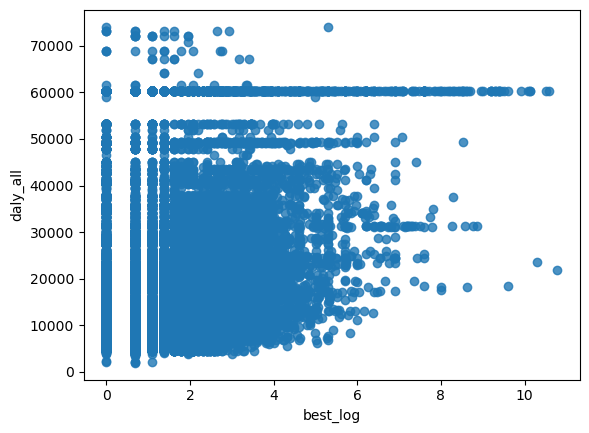

In [37]:
## simple regression scatterplot between two variables
plot4 = sns.regplot(x='best_log',y='daly_all',data= data_analysis,scatter=True,fit_reg=False)

[Text(0.5, 1.0, 'Y-o-Y % Change in daly versus Y-o-Y % Change in fatalities')]

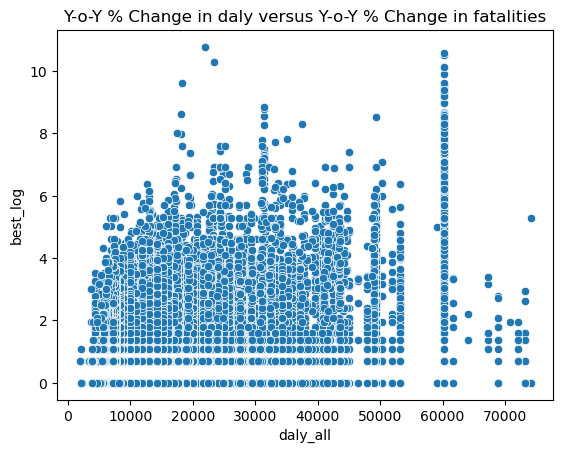

In [38]:
#plot of daly_all across all countries and years against the number of fatalities
 
sns.scatterplot(x=data_analysis['daly_all'], 
                y=data_analysis['best_log']).set(title='Y-o-Y % Change in daly versus Y-o-Y % Change in fatalities')

In [39]:
data = data_analysis.copy()

In [40]:
data.columns
data = data.filter(['iso', 'year_id','daly_all','best_log','best','dummy_conflict','dummy_conflict_lowtreshold',
                    'dummy_conflict_hightreshold','type_of_violence','intensity','gdp_log','dah_total_log',
                    'age0014_value','xpd_gdp_value','uhc_index','lag_best_5', 'lag_best_10',
       'lag_best_20','dummy_sb', 'dummy_ns', 'dummy_os', 'dummy_low_intensity', 'dummy_medium_intensity','dummy_high_intensity'])

In [41]:
#the country fixed effects model
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
mod = PanelOLS(data1.daly_all, data1.best_log, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0166
Estimator:                   PanelOLS   R-squared (Between):              0.0872
No. Observations:               31813   R-squared (Within):               0.0166
Date:                Thu, May 04 2023   R-squared (Overall):              0.0694
Time:                        16:51:49   Log-likelihood                -3.231e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      534.85
Entities:                          39   P-value                           0.0000
Avg Obs:                       815.72   Distribution:                 F(1,31773)
Min Obs:                       1.0000                                           
Max Obs:                       5290.0   F-statistic (robust):             13.135
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [42]:
#the country fixed effects model
from linearmodels.panel import PanelOLS
data3 = data.set_index(['iso','year_id'])
mod = PanelOLS(data3.daly_all, data3.lag_best_20, entity_effects=True,time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                     3.519e-05
Estimator:                   PanelOLS   R-squared (Between):             -0.0022
No. Observations:               31528   R-squared (Within):              -0.0008
Date:                Thu, May 04 2023   R-squared (Overall):             -0.0018
Time:                        16:52:11   Log-likelihood                -3.001e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.1070
Entities:                          39   P-value                           0.2927
Avg Obs:                       808.41   Distribution:                 F(1,31459)
Min Obs:                       1.0000                                           
Max Obs:                       5270.0   F-statistic (robust):             0.1222
                            

In [43]:
#the country fixed effects model
from linearmodels.panel import PanelOLS
data2 = data.set_index(['iso','year_id'])
mod = PanelOLS(data2.daly_all, data2., entity_effects=True,time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

SyntaxError: invalid syntax (2615433423.py, line 4)

In [ ]:
data.

In [ ]:
### but the PANELOLS function from lienarmodels does exactly that already
'dummy_sb', 'dummy_ns', 'dummy_os',
       'intensity', 'dummy_low_intensity', 'dummy_medium_intensity',
       'dummy_high_intensity'

In [ ]:
#standard = data['age0014_value','gdp_log','xpd_gdp_value']
#health = data['uhc_index','dah_total_log']


from linearmodels.panel import PanelOLS
mod = PanelOLS.from_formula('daly_all ~best_log+lag_best_10',data=data.set_index(['iso','year_id']))

result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary.tables[1]
print(result)

In [ ]:
#can throw out the xpd_gdp_value since it has too much missingness and is insignificant

In [ ]:
### now I try my luck in R